## Simulation Study

In [1]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(12345)

# Parameters
n = 5000
a1 = 0.5
a2 = 0.55
lambda_ = 1

# Initialize arrays
y1 = np.zeros(n)
y2 = np.zeros(n)

# Generate random normal errors
e1 = np.random.normal(0, 1, n)
e2 = np.random.normal(0, 1, n)

# Simulation loop
for i in range(1, n):
    y1[i] = y1[i-1] + a1 * (y1[i-1] - lambda_ * y2[i-1]) + e1[i]
    y2[i] = y2[i-1] + a2 * (y1[i-1] - lambda_ * y2[i-1]) + e2[i]

# y1 and y2 contain the simulated data


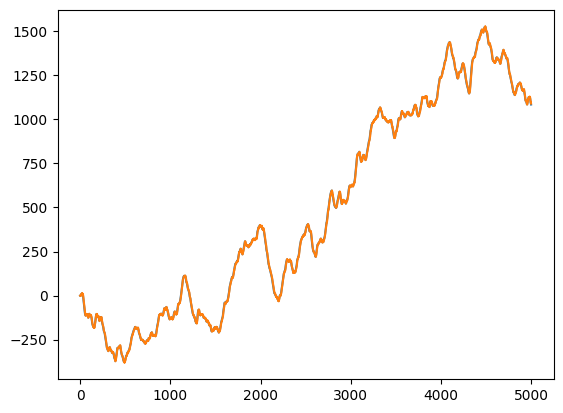

In [2]:
import matplotlib.pyplot as plt

plt.plot(y1, label='y1')
plt.plot(y2, label='y2')

In [3]:
from quantbullet.tsa import VectorErrorCorrectionModel

In [34]:
data = np.vstack([y1, y2]).T
vecm = VectorErrorCorrectionModel(coint_rank=1, k_ar_diff=1)
vecm.fit(data)

In [35]:
vecm.ConintegrationVector

array([[ 1.        ],
       [-1.00002902]])

In [43]:
diff = y1 - y2
integrated = vecm.getIntegratedSeries(data)

In [44]:
vecm.getIntegratedSeries(data)

array([[ 0.        ],
       [-0.38460392],
       [-1.39661829],
       ...,
       [-5.47255151],
       [-2.55630579],
       [-5.25844917]])

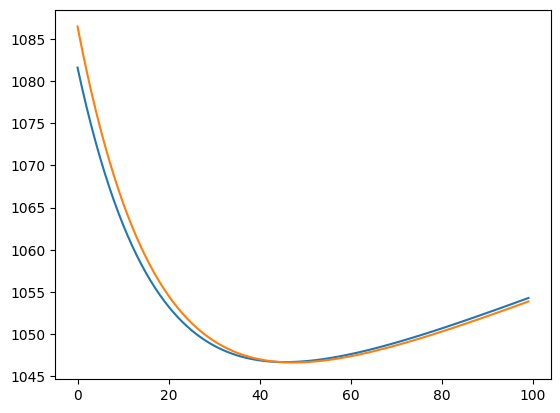

In [45]:
# the predict function is used to forecast the series themsevles
pred = vecm.predict(steps=100)
plt.plot(pred);

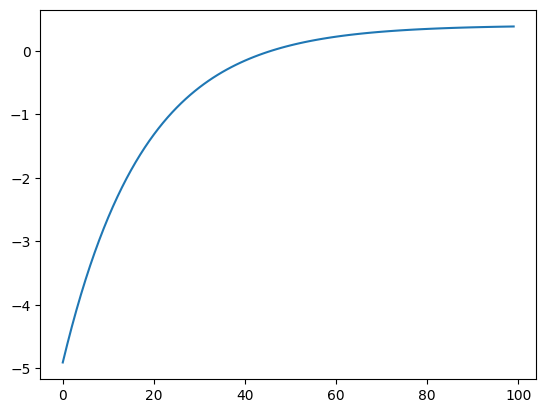

In [46]:
# the integrated series can be forecasted as well
diff_pred = vecm.getIntegratedSeries(pred).ravel()
plt.plot(diff_pred);

In [47]:
historical_integrated = vecm.getIntegratedSeries(data).ravel()
print(historical_integrated.mean())
print(historical_integrated.std())

0.4194221853623865
4.283076663488725


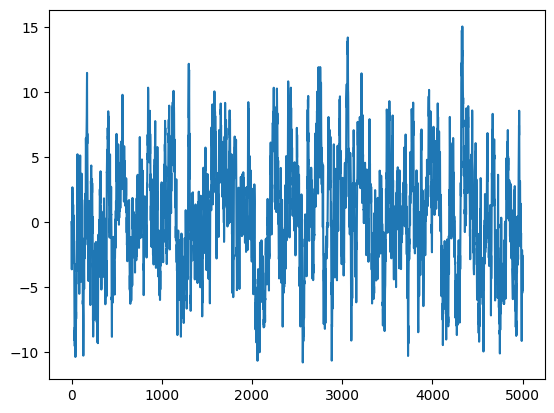

In [48]:
plt.plot(vecm.getIntegratedSeries(data).ravel())